In [1]:
%load_ext autoreload
%autoreload 1


In [2]:
import scipy
from __future__ import division
import scikits.audiolab as audio

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

ImportError: No module named scikits.audiolab

In [8]:
# http://nbviewer.ipython.org/gist/chriddyp/9827cb5086cfab8da092/Widgets%20-%20Plotly%20Graph%20Widget%20Overview.ipynb
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('BaoDuyDuong', 'li7wn43s3a')

In [9]:
url = py.plot([Scatter(x=[1, 2, 3], y=[4, 6, 9]), Scatter(x=[1, 2, 3], y=[10, 30, 20])], filename='widget template', auto_open=False)
print url

https://plot.ly/~BaoDuyDuong/3


In [10]:
graph = GraphWidget(url)
g = graph
graph

In [11]:
## http://nbviewer.ipython.org/gist/chriddyp/9827cb5086cfab8da092/Pandas%20Widget%20-%20Walkthrough.ipynb

from IPython.display import Image
Image(url='http://i.imgur.com/OUVRQ1u.gif')


In [12]:
from IPython.html import widgets 
from IPython.display import display, clear_output

import plotly.plotly as py
from plotly.graph_objs import *
import plotly
from plotly.widgets import GraphWidget

import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/widgets/master/ipython-examples/311_150k.csv', infer_datetime_format=True)
df = df
df.head()

In [7]:
# Make it interactive!
from ipywidgets import StaticInteract, RangeWidget
StaticInteract(factorit,
               n=RangeWidget(2, 20))

ImportError: No module named ipywidgets

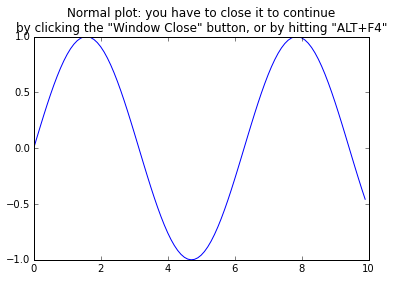

AttributeError: 'FigureManagerBase' object has no attribute 'window'

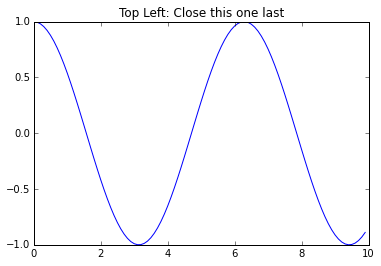

In [14]:
%matplotlib inline
'''Interactive graphs with Matplotlib have haunted me. So here I have collected a number of
tricks that should make interactive use of plots simpler. The functions below show how to

- Position figures on the screen (e.g. top left half of display)
- Pause and proceed automatically after a few sec
- Proceed on a click, or a keyboard hit
- Evaluate keyboard inputs

author: Thomas Haslwanter
date:   March-2015
ver:    1.0
license: Creative Commons Zero (almost public domain) http://scpyce.org/cc0

'''

import numpy as np
import matplotlib.pyplot as plt
import Tkinter as tk

t = np.arange(0,10,0.1)
c = np.cos(t)
s = np.sin(t)

def normalPlot():
    '''Just show a plot. The progam stops, and only continues when the plot is closed,
    either by hitting the "Window Close" button, or by typing "ALT+F4". '''
    
    plt.plot(t,s)
    plt.title('Normal plot: you have to close it to continue\nby clicking the "Window Close" button, or by hitting "ALT+F4"')
    plt.show()
    
def positionOnScreen():
    '''Position two plots on your screen. This uses the Tickle-backend, which I think is the default on all platforms.'''
    # Get the screen size
    root = tk.Tk()
    (screen_w, screen_h) = (root.winfo_screenwidth(), root.winfo_screenheight())
    root.destroy()
    
    # The program continues after the first plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t,c)
    ax.set_title('Top Left: Close this one last')
    
    # Position the first graph in the top-left half of the screen
    position_topLeft = '{0}x{1}+{2}+{3}'.format(screen_w//2, screen_h//2,0,0)
    fig.canvas.manager.window.geometry(position_topLeft)
    
    # Put another graph in the top right half
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.plot(t,s)
    # I don't completely understand why this one has to be closed first. But otherwise the program gets unstable.
    ax2.set_title('Top Right: Close this one first (e.g. with ALT+F4)')

    position_topRight = '{0}x{1}+{2}+{3}'.format(screen_w//2, screen_h//2,screen_w//2,0)
    fig2.canvas.manager.window.geometry(position_topRight)
    
    plt.show()

def showAndPause(): 
    '''Show a plot only for 2 seconds, and then proceed automatically'''
    plt.plot(t,s)
    plt.title('Don''t touch! I will proceed automatically.')
    
    plt.show(block=False)
    duration = 2    # [sec]
    plt.pause(duration)
    plt.close()
    
def waitForInput():    
    ''' This time, proceed with a click or by hitting any key '''
    plt.plot(t,c)
    plt.title('Click in that window, or hit any key to continue')
    
    plt.waitforbuttonpress()
    plt.close()

def keySelection():
    '''Wait for user intput, and proceed depending on the key entered.
    This is a bit complex. But None of the versions I tried without
    key binding were completely stable.'''
    
    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('key_press_event', on_key_event)
    
    # Disable default Matplotlib shortcut keys:
    keymaps = [param for param in plt.rcParams if param.find('keymap') >= 0]
    for key in keymaps:
        plt.rcParams[key] = ''
    
    ax.plot(t,c)
    ax.set_title('First, enter a vowel:')
    plt.show()
    
def on_key_event(event):
    '''Keyboard interaction'''

    #print('you pressed %s'%event.key)        
    key = event.key

    # In Python 2.x, the key gets indicated as "alt+[key]"
    # Bypass this bug:
    if key.find('alt') == 0:
        key = key.split('+')[1]

    curAxis = plt.gca()
    if key in 'aeiou':
        curAxis.set_title('Well done!')
        plt.pause(1)
        plt.close()
    else:
        curAxis.set_title(key + ' is not a vowel: try again to find a vowel ....')
        plt.draw()
    
if __name__ == '__main__':
    normalPlot()    
    positionOnScreen()    
    showAndPause()    
    waitForInput()    
    keySelection()

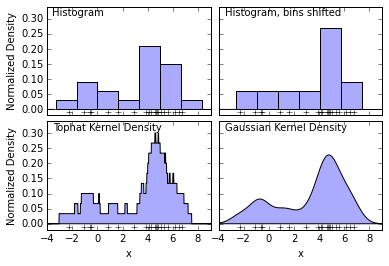

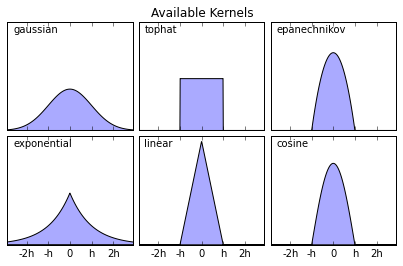

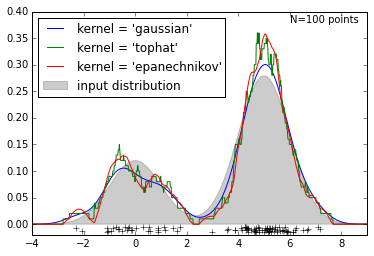

In [13]:
%matplotlib inline
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

#----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()


best bandwidth: 3.79269019073


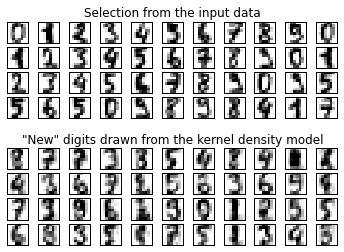

In [15]:
%matplotlib inline
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#example-neighbors-plot-digits-kde-sampling-py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV

# load the data
digits = load_digits()
data = digits.data

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()